In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Importing The Dataset

In [ ]:
path = "water_potability.csv"
df = pd.read_csv(path)

## Initial Analysis

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
df['Potability']=df['Potability'].astype('category')

### Statistical Analysis

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


From the above table, we can see that the count of each feature are not same. so there must me some null values. Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high. However, the above description is for overall population. lets try the same for 2 samples based on Portability feature


In [ ]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [ ]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

### Check for missing values

<Axes: title={'center': 'Missing Values Per Feature'}>

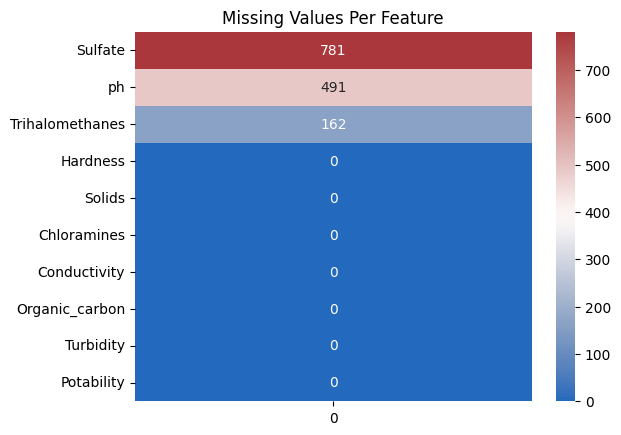

In [ ]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [ ]:
df[df['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [ ]:
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.


<ipython-input-122-dd8d85405d93>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

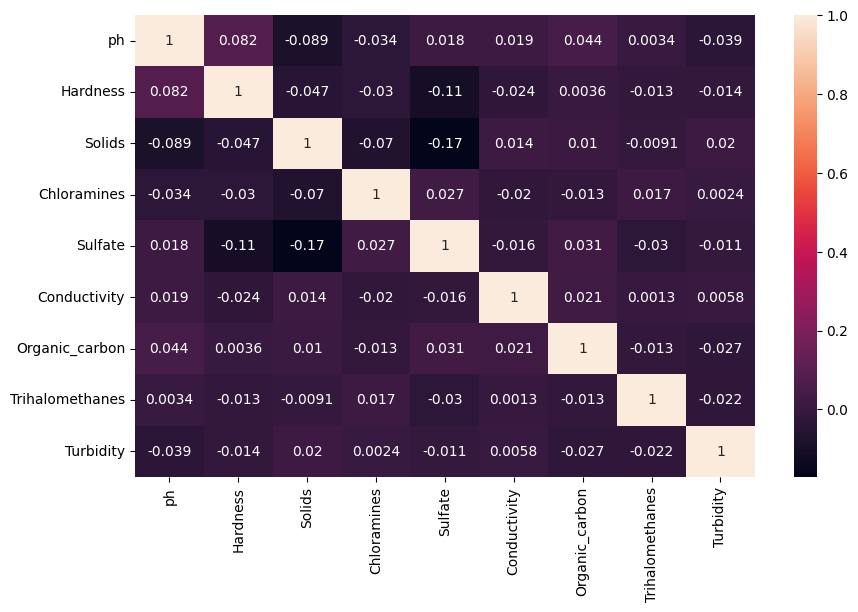

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Percentage of missing values')

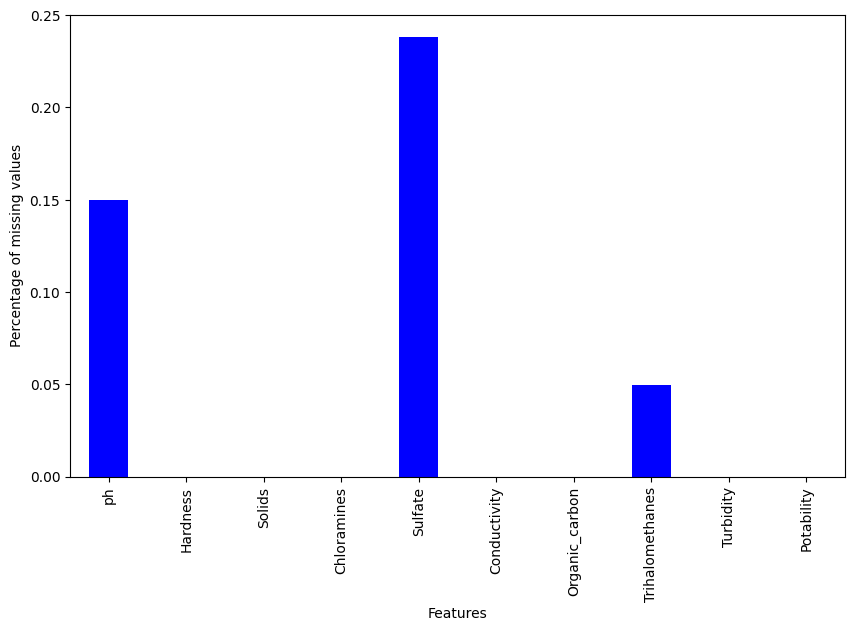

In [ ]:
df.isnull().mean().plot.bar(figsize = (10, 6), color='blue')
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

<b> Imputing the missing values with the mean</b>

In [ ]:
#################################### Imputing 'ph' value #####################################

phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [ ]:
print('Checking to see any more missing data \n')
df.isna().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

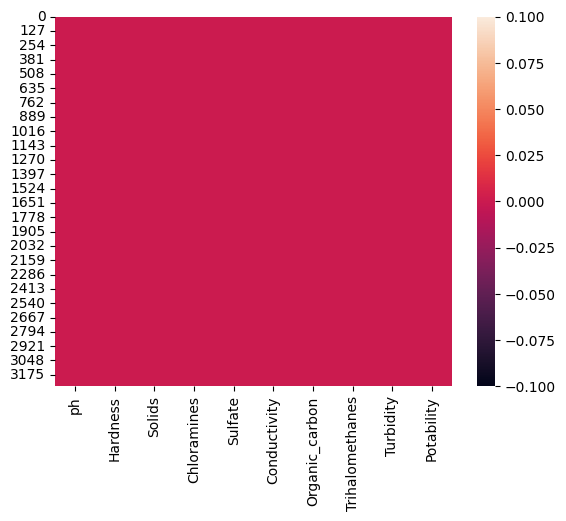

In [ ]:
sns.heatmap(df.isnull())

## Exploratory Data Analysis

<ipython-input-127-b6b545f70c81>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



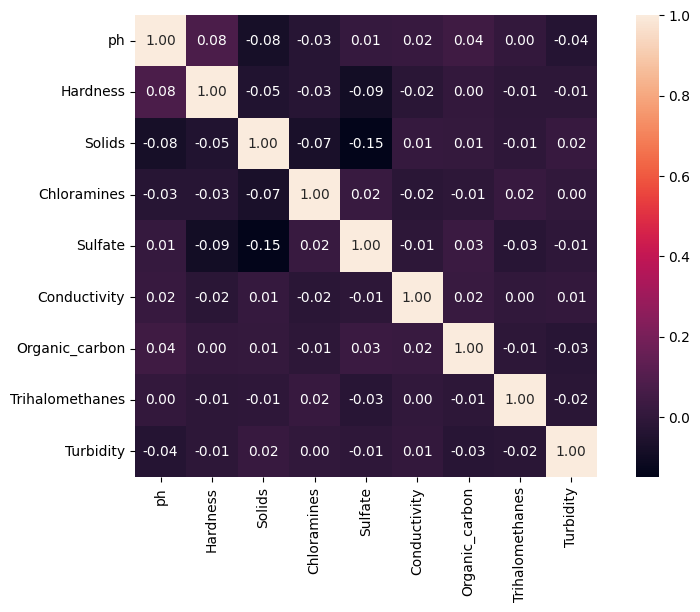

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), square = True, annot=True, fmt='.2f')
plt.show()

In [ ]:
fig =  ex.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

<Axes: xlabel='Potability', ylabel='ph'>

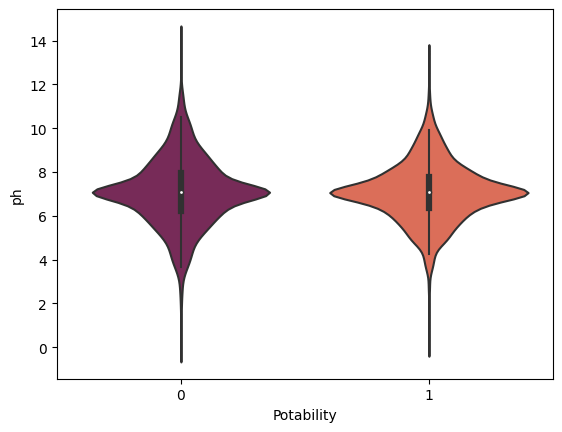

In [ ]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

Boxplot and density distribution of different features by Potability



<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-130-b76157b2b949>:8: UserWarning:

Ignoring `palette` because no 

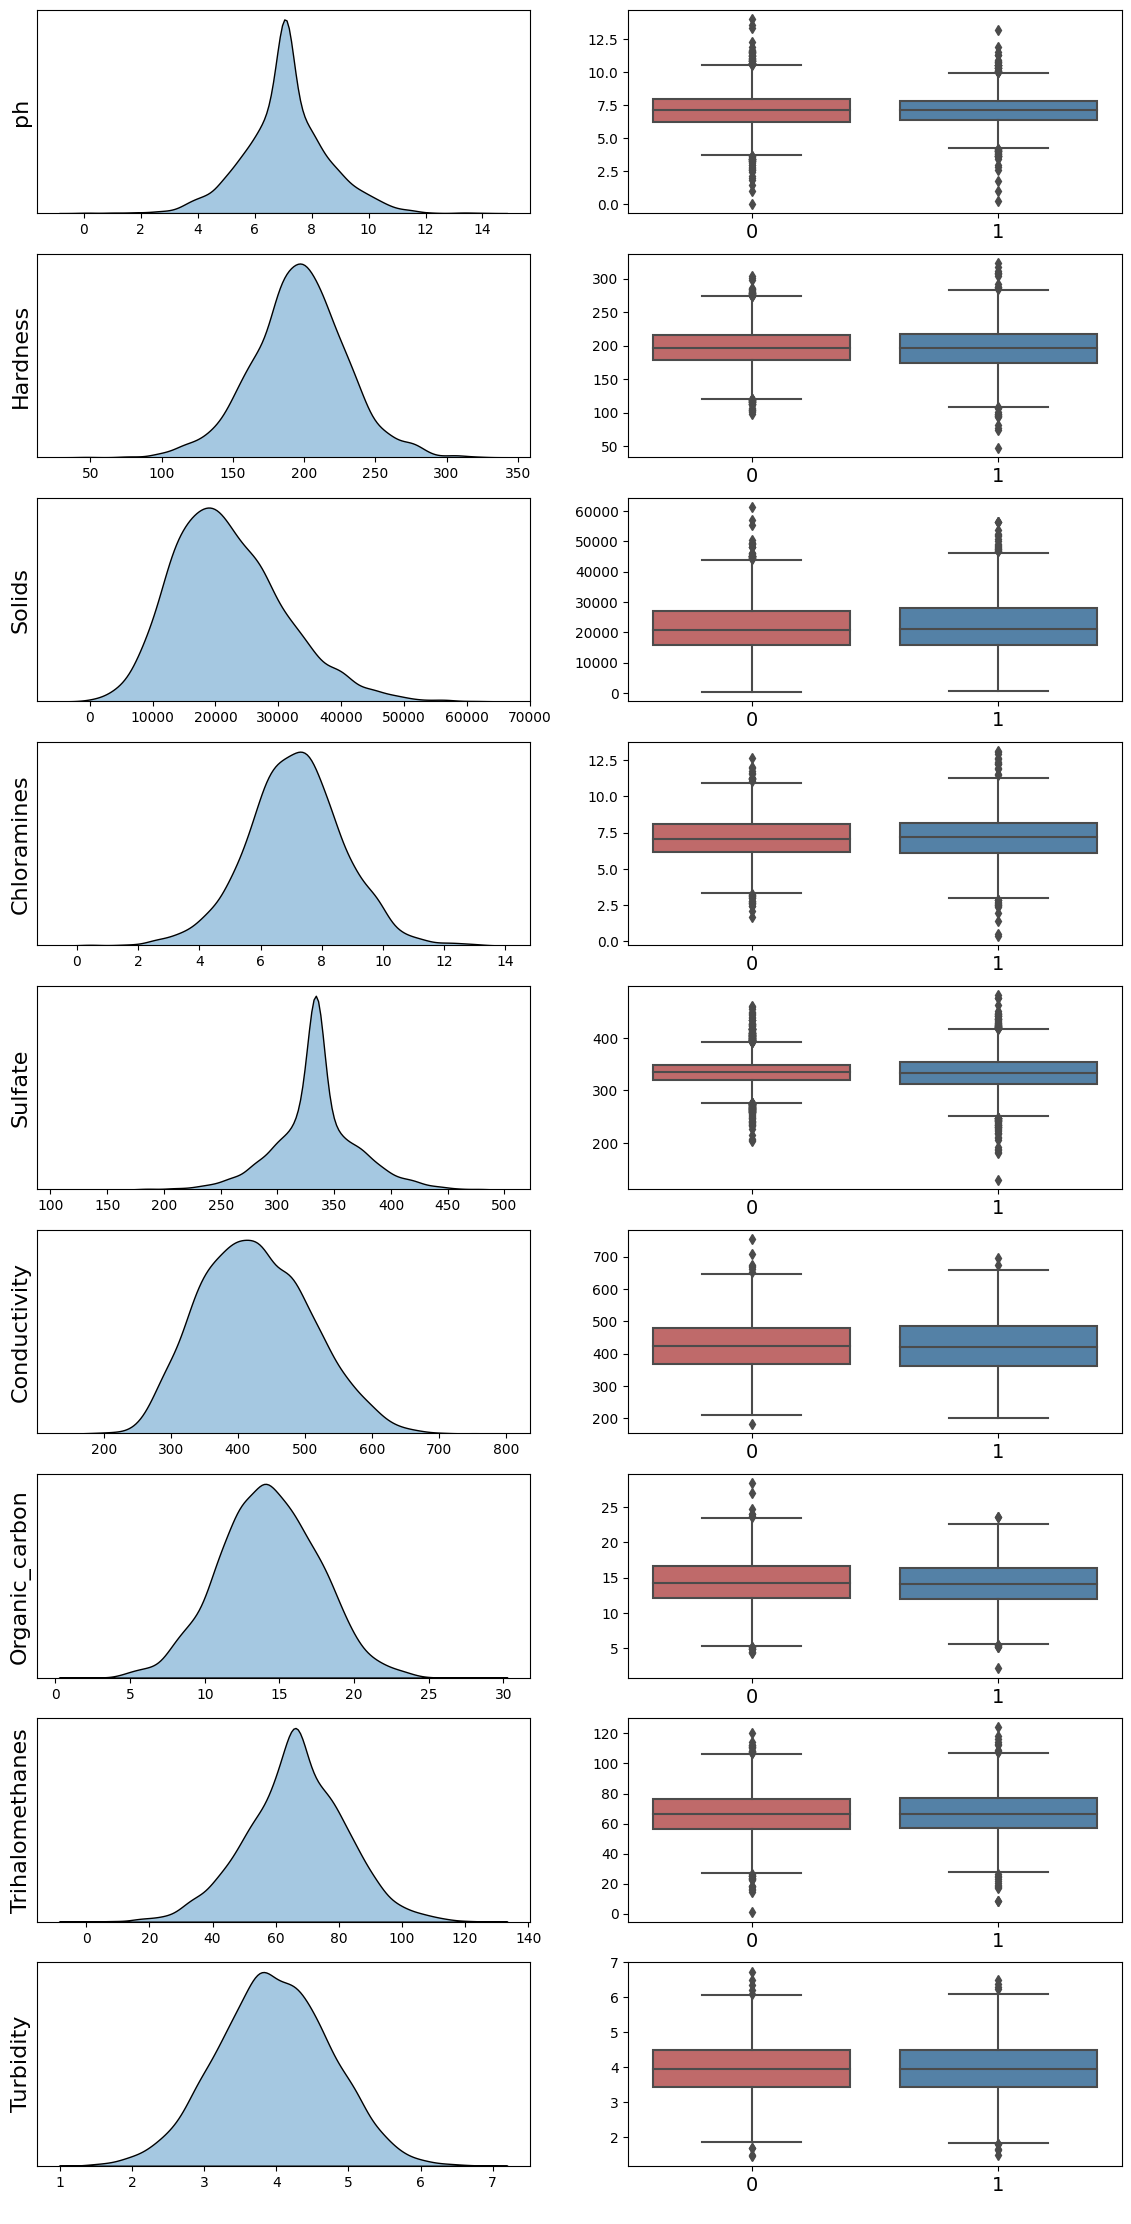

In [ ]:

print('Boxplot and density distribution of different features by Potability\n')

fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features = list(df.columns.drop('Potability'))
i=0
for cols in features:
    sns.kdeplot(df[cols], fill=True, alpha=0.4, palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i,0])
    sns.boxplot(data= df, y=cols, x='Potability', ax=ax[i, 1], palette=('indianred', 'steelblue'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1

plt.show()

## SMOTE

In [ ]:
##################### Preparing the Data for Modelling ######################

X = df.drop('Potability', axis = 1).copy()
y = df['Potability'].copy()

############################# Train-Test split ############################
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

########################## Synthetic OverSampling ###########################
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y_train)
print('Before SMOTE', counter)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('\nAfter SMOTE', counter)

################################# Scaling #################################
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

modelAccuracy = list()

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1506, 1: 951})

After SMOTE Counter({1: 1506, 0: 1506})


## Modelling and Prediction

Confusion Matrix for DecisionTreeClassifier(random_state=15) :
 [[365 127]
 [100 227]]


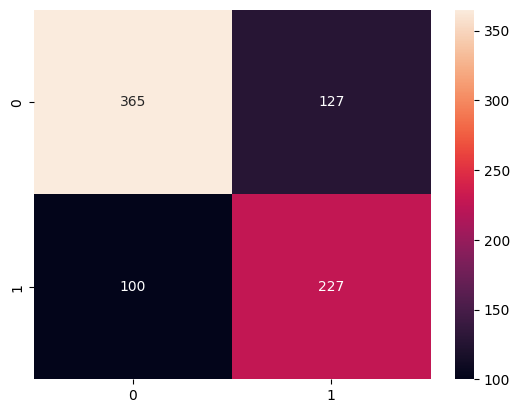

Classification Report for DecisionTreeClassifier(random_state=15) :
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       492
           1       0.64      0.69      0.67       327

    accuracy                           0.72       819
   macro avg       0.71      0.72      0.71       819
weighted avg       0.73      0.72      0.72       819

Confusion Matrix for RandomForestClassifier(random_state=15) :
 [[394  98]
 [ 75 252]]


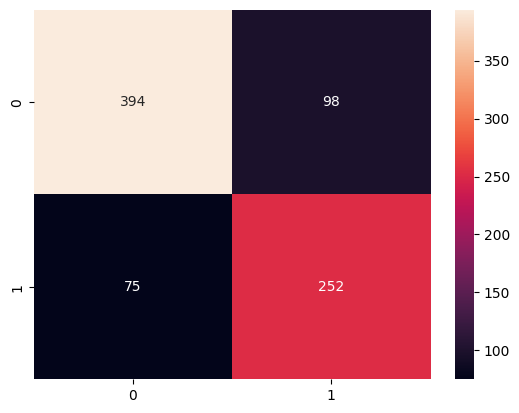

Classification Report for RandomForestClassifier(random_state=15) :
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       492
           1       0.72      0.77      0.74       327

    accuracy                           0.79       819
   macro avg       0.78      0.79      0.78       819
weighted avg       0.79      0.79      0.79       819

                    Model  Train_Accuracy  Test_Accuracy
0  DecisionTreeClassifier       71.680161      72.283272
1  RandomForestClassifier       80.312094      78.876679


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=15)
random_forest = RandomForestClassifier(random_state=15)

# Create lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# List of models
models = [decision_tree, random_forest]

for mdl in models:
    train_result = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    train_accuracy.append(train_result.mean() * 100)

    # Training the model
    mdl.fit(X_train, y_train)

    # Making predictions using the model
    y_pred = mdl.predict(X_test)
    test_result = accuracy_score(y_test, y_pred)
    test_accuracy.append(test_result * 100)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix for", mdl, ":\n", cm)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    # Classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report for", mdl, ":\n", report)

# Create DataFrames for the model scores
model_scores = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier'],
    'Train_Accuracy': train_accuracy,
    'Test_Accuracy': test_accuracy
})

# Display the model scores
print(model_scores)

### Conclusion

*   Random Forest worked the best to train the model,
*   It gives us f1 score (Balanced with precision & recall) as around 79%.
